# Model
## load libraries and functions

In [ ]:
# libraries ####
devtools::install_github("rstudio/keras")
install.packages("tidyverse")
library(keras)
library(tidyverse)
## costum functions ####
create_matrix <- function(n_rows, n_cols) {
  # Generate a vector of random numbers between 0 and 1
  data <- runif(n_rows * n_cols)

  # Create a matrix from the vector
  matrix <- matrix(data, nrow = n_rows, ncol = n_cols)

# Normalize the matrix such that the sum of each column is 1
  for (i in 1:n_cols) {
    matrix[, i] <- matrix[, i] / sum(matrix[, i])
  }

  return(matrix)
}
min_max_scaling <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}



Skipping install of 'keras' from a github remote, the SHA1 (d8c9e28e) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# load data ####
tissue_pseudobulk_data <- read.csv("input_22.csv")
data <- tissue_pseudobulk_data #[c(1:5,c(17276:17279)),1:5]
tail(data)
## preprocess data --- scale ####
split_gene_features <- data[c(1:22),-1]
tail(split_gene_features)


,ENSEMBL,avg,datos...2.,datos...2..1,datos...2..2,datos...2..3,datos...2..4,datos...2..5,datos...2..6,datos...2..7,datos...2..8,datos...2..9,datos...2..10,datos...2..11,datos...2..12,datos...2..13
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,ENSG00000110436,5.852076,3.649435,4.642402,3.996960,3.996960,3.676506,4.258524,4.782977,4.987370,4.988927,5.010840,3.4614782,4.578959,5.816827,5.417718
20,ENSG00000155886,4.150416,3.252994,4.396201,3.496597,3.496597,4.026074,3.825967,4.144374,4.367679,3.707022,4.504819,3.6269233,4.633240,4.931287,4.932010
21,ENSG00000147488,4.761013,3.035550,4.993605,3.426055,3.426055,4.238830,4.131735,5.054408,4.836034,3.923564,4.835064,3.3134912,4.821044,5.122124,5.228724
22,ENSG00000073849,4.621935,2.164332,3.983863,2.059301,2.059301,1.761852,3.486348,4.755170,4.418591,4.513338,4.172094,0.7141367,4.363391,4.618421,4.270036
23,sex,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0000000,0.000000,1.000000,1.000000
24,condition,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0000000,0.000000,0.000000,0.000000


,avg,datos...2.,datos...2..1,datos...2..2,datos...2..3,datos...2..4,datos...2..5,datos...2..6,datos...2..7,datos...2..8,datos...2..9,datos...2..10,datos...2..11,datos...2..12,datos...2..13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,4.561187,3.310800,4.664368,3.089309,3.089309,4.065858,3.692696,4.690381,4.426384,3.588523,4.246935,3.8631913,4.459028,4.432549,4.265383
18,2.920038,3.379806,3.479461,3.579110,3.579110,3.284708,3.853253,4.519868,3.791683,4.482599,3.538597,2.9243317,4.525882,3.777117,4.016649
19,5.852076,3.649435,4.642402,3.996960,3.996960,3.676506,4.258524,4.782977,4.987370,4.988927,5.010840,3.4614782,4.578959,5.816827,5.417718
20,4.150416,3.252994,4.396201,3.496597,3.496597,4.026074,3.825967,4.144374,4.367679,3.707022,4.504819,3.6269233,4.633240,4.931287,4.932010
21,4.761013,3.035550,4.993605,3.426055,3.426055,4.238830,4.131735,5.054408,4.836034,3.923564,4.835064,3.3134912,4.821044,5.122124,5.228724
22,4.621935,2.164332,3.983863,2.059301,2.059301,1.761852,3.486348,4.755170,4.418591,4.513338,4.172094,0.7141367,4.363391,4.618421,4.270036


In [ ]:
### convert to binary
dim(data)
binary_sex <- (data[23,-1])
binary_condition <- (data[24,-1])
binary_sex


[1] 24 16

,avg,datos...2.,datos...2..1,datos...2..2,datos...2..3,datos...2..4,datos...2..5,datos...2..6,datos...2..7,datos...2..8,datos...2..9,datos...2..10,datos...2..11,datos...2..12,datos...2..13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [ ]:
scale_genes <- t(scale(t(data.matrix(split_gene_features))))
#scale_genes <- sapply(t(data.matrix(split_gene_features)),min_max_scaling)
# (colnames(split_gene_features) == colnames(binary_sex) ) == colnames(binary_condition)
head(scale_genes)
x_original <- rbind(scale_genes,binary_sex,binary_condition)

,avg,datos...2.,datos...2..1,datos...2..2,datos...2..3,datos...2..4,datos...2..5,datos...2..6,datos...2..7,datos...2..8,datos...2..9,datos...2..10,datos...2..11,datos...2..12,datos...2..13
1,0.6648486,-1.02251763,0.770839681,-0.9267966,-0.9267966,-0.8750437,-0.7855671,0.2577404,0.6038839,-0.2089741,0.8388159,-1.8249945,0.6478873,1.3386027,1.4480716
2,1.3071451,0.11443569,-0.247522210,-0.6892695,-0.6892695,-2.0893628,-0.9154077,0.7282029,1.1389475,0.5629869,0.5512892,-1.5450812,0.8097351,0.2489209,0.7142496
3,-1.5744723,-0.07180996,-0.929278238,1.3729978,1.3729978,1.1626495,0.1423393,-2.1367872,0.2843948,0.7032444,-0.1567757,-0.2167671,-0.2793158,-0.1246820,0.4512646
4,-0.8819106,-0.79191744,0.963667571,-0.5117070,-0.5117070,-1.0656170,-1.0680300,-1.0691951,0.9924874,1.4824340,0.6924434,-0.9582678,1.4959204,0.8868126,0.3445867
5,0.3689417,-1.70804627,0.008318614,-1.1679330,-1.1679330,-0.5758376,-0.4494701,0.6667245,1.1128021,-0.5760530,0.4912346,-0.7883718,1.1201626,1.3349918,1.3304689
6,1.0603816,-2.05156964,-0.204237013,-1.1727669,-1.1727669,-0.1143000,-0.4958516,0.6799389,0.9562644,-0.3256429,0.4159400,-0.7488612,0.9397562,1.0149787,1.2187362


In [ ]:
tail(x_original)

,avg,datos...2.,datos...2..1,datos...2..2,datos...2..3,datos...2..4,datos...2..5,datos...2..6,datos...2..7,datos...2..8,datos...2..9,datos...2..10,datos...2..11,datos...2..12,datos...2..13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,1.6338821,-1.2585951,0.04535418,-0.8022305,-0.8022305,-1.2230467,-0.45874809,0.22995643,0.4983615,0.5004067,0.5291823,-1.5054177,-0.03795722,1.5875935,1.0634891
20,0.0965085,-1.6038467,0.56220084,-1.1422886,-1.1422886,-0.1390838,-0.51822803,0.08506131,0.5081584,-0.7435944,0.7680008,-0.8953584,1.01132088,1.5760339,1.5774040
21,0.5565564,-1.7416249,0.86635116,-1.2215031,-1.2215031,-0.1389501,-0.28159218,0.94733575,0.6564788,-0.5588602,0.6551872,-1.3714287,0.63651301,1.0375285,1.1795114
22,0.8720433,-0.9790075,0.39145135,-1.0581162,-1.0581162,-1.2821527,0.01672662,0.97239496,0.7188855,0.7902491,0.5332257,-2.0712851,0.67730956,0.8693963,0.6069954
23,1.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,1.0000000,1.0000000,0.00000000,1.0000000,1.0000000
24,0.0000000,1.0000000,0.00000000,1.0000000,1.0000000,1.0000000,1.00000000,0.00000000,0.0000000,1.0000000,0.0000000,1.0000000,0.00000000,0.0000000,0.0000000


In [ ]:
# Create a matrix with random numbers
number_of_cell_types = 3
number_of_samples = dim(x_original)[2] # number of patients
y_original <- read.csv("outputpat.csv")
y_original <- y_original[c(1:3), -1]
# Normalize the columns to sum to 1
#y_original <- y_original / colSums(y_original)

In [ ]:
y_original

,Freq,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,Freq11,Freq12,Freq13,Freq14,Freq15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.08363636,0.13023873,0.009746589,0.08972822,0.22585837,0.3256,0.14626289,0.1621212,0.1770509,0.13159815,0.1502008,0.3511864,0.1694967,0.1459706,0.4102564
2,0.05200000,0.05517241,0.200779727,0.02977618,0.07993562,0.0432,0.09310567,0.1174242,0.1173416,0.09705668,0.1078313,0.3396610,0.1276531,0.1221490,0.1623932
3,0.86436364,0.81458886,0.789473684,0.88049560,0.69420601,0.6312,0.76063144,0.7204545,0.7056075,0.77134517,0.7419679,0.3091525,0.7028502,0.7318804,0.4273504


In [ ]:
# build the model ####
x <- x_original
y <- y_original
tissue_composition <- dim(y)[1]
number_of_features <- dim(x)[1]
dim(x)
dim(y)
tissue_composition

[1] 24 15

[1]  3 15

[1] 3

In [ ]:
# Assuming you have a dataset 'data' with features 'x' and labels 'y'
x <- t(x)
y <- t(y)
# Set a random seed for reproducibility
set.seed(123)

# Define the proportion of data to use for testing (e.g., 20%)
test_split_ratio <- 0.2

# Generate random indices for splitting the data
num_samples <- nrow(x)
num_test_samples <- round(num_samples * test_split_ratio)
test_indices <- sample(1:num_samples, num_test_samples)

# Split the data into training and test sets
x_train <- x[-test_indices, ]  # Training features
y_train <- y[-test_indices, ]  # Training labels
x_test <- x[test_indices, ]    # Test features
y_test <- y[test_indices, ]    # Test labels

# Now you have x_train, y_train for training, and x_test, y_test for testing

In [ ]:
test_indices

[1] 15  3 14

In [ ]:

# Initialize model
model <- keras_model_sequential()


In [ ]:
dim(x_original)[1]

[1] 24

In [ ]:

# Add layers
feature_factor = 1
feacture_factor2 = 0.5
model %>%
  layer_dense(units = feature_factor*number_of_features, activation = 'sigmoid', input_shape = dim(x)[2]) %>% # units=265 relu
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = number_of_features, activation = 'sigmoid') %>% #units = 128 relu
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = tissue_composition, activation = 'softmax')


In [ ]:
tissue_composition
dim(x)[2]

[1] 3

[1] 24

In [ ]:

# Compile model
model %>% compile(
  loss = 'categorical_crossentropy', # binary_crossentropy #
  optimizer = optimizer_rmsprop(),#optimizer_rmsprop(),
  metrics = c('accuracy')
)


In [ ]:
head(x)

,1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
avg,0.6648486,1.3071451,-1.57447226,-0.8819106,0.368941661,1.060382,0.005362637,1.63087816,1.5504717,0.6542465,⋯,0.8650998,-0.4931854,0.95330065,-1.5385393,1.63388214,0.0965085,0.5565564,0.8720433,1,0
datos...2.,-1.0225176,0.1144357,-0.07180996,-0.7919174,-1.708046270,-2.051570,-0.692113891,-1.57604636,-1.6226548,-1.7181675,⋯,-1.6528848,-1.5536772,-1.28956487,-0.6432575,-1.25859505,-1.6038467,-1.7416249,-0.9790075,0,1
datos...2..1,0.7708397,-0.2475222,-0.92927824,0.9636676,0.008318614,-0.204237,-1.696165449,-0.01147722,-1.5453058,0.6259057,⋯,0.2331938,1.3101218,1.13837890,-0.4492048,0.04535418,0.5622008,0.8663512,0.3914514,0,0
datos...2..2,-0.9267966,-0.6892695,1.37299784,-0.5117070,-1.167933037,-1.172767,-0.018615223,-1.33256749,0.7835212,-1.2454271,⋯,-0.9450782,-0.9713387,-1.68686189,-0.2551631,-0.80223047,-1.1422886,-1.2215031,-1.0581162,0,1
datos...2..3,-0.9267966,-0.6892695,1.37299784,-0.5117070,-1.167933037,-1.172767,-0.018615223,-1.33256749,0.7835212,-1.2454271,⋯,-0.9450782,-0.9713387,-1.68686189,-0.2551631,-0.80223047,-1.1422886,-1.2215031,-1.0581162,0,1
datos...2..4,-0.8750437,-2.0893628,1.16264945,-1.0656170,-0.575837557,-0.114300,-1.352690188,-1.31431999,-0.3264395,-0.5515756,⋯,-0.5458156,0.3806522,0.06480958,-0.8284360,-1.22304674,-0.1390838,-0.1389501,-1.2821527,0,1


In [ ]:
head(y)

,1,2,3
Freq,0.083636364,0.05200000,0.8643636
Freq2,0.130238727,0.05517241,0.8145889
Freq3,0.009746589,0.20077973,0.7894737
Freq4,0.089728217,0.02977618,0.8804956
Freq5,0.225858369,0.07993562,0.6942060
Freq6,0.325600000,0.04320000,0.6312000


In [ ]:
# Train model
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 30,
  batch_size = 4,
)

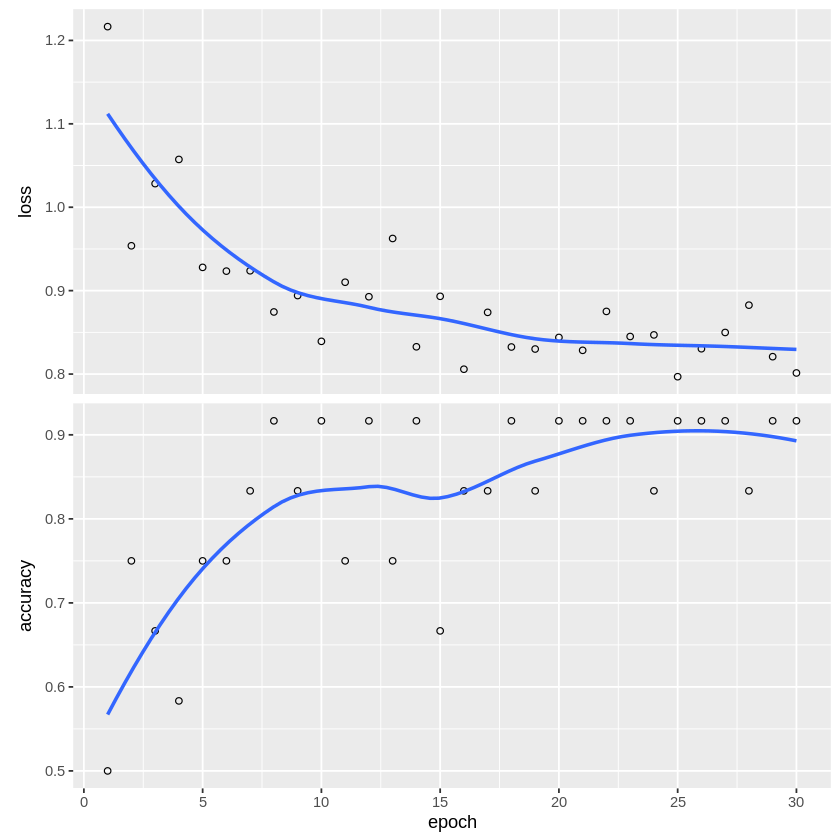

In [ ]:
plot(history)

In [ ]:
# Evaluate model
model %>% evaluate(x_test,y_test)



loss  accuracy 
0.9063619 1.0000000

In [ ]:
# Make predictions
#out put layer (softmax vector)
predictions = model %>% predict(x_test)
head(predictions)
head(model %>% predict(x_test)) %>% apply(1, sum)

0.09556587,0.02498088,0.8794533
0.11851319,0.00333549,0.8781513
0.07996369,0.02795538,0.8920809


[1] 1 1 1

In [ ]:
head(y_test)
head(y_test %>% apply(1, sum))

,1,2,3
Freq15,0.410256410,0.1623932,0.4273504
Freq3,0.009746589,0.2007797,0.7894737
Freq14,0.145970603,0.1221490,0.7318804


Freq15  Freq3 Freq14 
     1      1      1

In [ ]:
head(x_test[,1:2])

,1,2
datos...2..13,1.4480716,0.7142496
datos...2..1,0.7708397,-0.2475222
datos...2..12,1.3386027,0.2489209


# Predict bulk data

In [ ]:
# process and prepare bulk for pipeline
data_bulk <- read.csv("bulk_tissue_data.csv")
genes_in_singleCell <- tissue_pseudobulk_data$ENSEMBL[1:22]
genes_filter_bulk <- data_bulk %>% filter(ensembl_gene_id %in% genes_in_singleCell)
matched_gene_order_bulk <- genes_filter_bulk %>% arrange(match(ensembl_gene_id,genes_in_singleCell))
# remove ensembl
split_gene_features <- matched_gene_order_bulk[,-1]
### convert to binary
binary_sex <- ifelse(data_bulk[17276,] == "F", 1, 0)[,-1]
binary_condition <- ifelse( data_bulk[17279,] == "control", 0, 1)[,-1]

# scale
scale_genes <- t(scale(t(data.matrix(split_gene_features))))
head(scale_genes)
head(binary_sex)
head(binary_condition)
bulk_genes_filtered <- rbind(scale_genes,binary_sex,binary_condition)
bulk_genes_filtered
x_test_bulk <- bulk_genes_filtered

GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
-0.37928314,-1.7504326,-1.4762027,-1.7504326,-0.1050532,-0.92774293,-0.6535130,-0.6535130,0.71763644,-0.9277429,⋯,0.7176364,0.9918663,0.99186634,1.2660962,1.2660962,0.9918663,0.1691767,0.7176364,1.8145560,0.1691767
0.89745626,1.4941113,1.0963413,0.8974563,0.1019162,0.69857125,0.4996862,0.1019162,0.69857125,0.8974563,⋯,-0.2958538,-0.8925089,0.30080122,-1.0913939,-1.0913939,-0.4947388,-0.8925089,0.6985712,0.6985712,-0.6936239
1.43145599,0.2665869,1.4314560,1.1984822,0.9655084,0.96550837,0.4995608,0.9655084,0.96550837,-0.4323345,⋯,-0.4323345,-0.8982821,-1.83017733,-2.5290988,-1.8301773,-1.1312559,-0.1993607,-0.8982821,-0.4323345,-0.1993607
1.03730290,0.2451377,-0.3885945,1.6710351,-0.2301614,0.08670465,-0.5470275,-0.7054606,0.87886985,1.3541690,⋯,-0.5470275,-1.1807597,-0.54702752,0.8788699,1.9879011,-1.3391927,-0.2301614,-0.7054606,-0.3885945,1.8294681
-1.34374283,0.9758905,0.5409593,-1.4887199,-1.6336970,0.83091344,0.9758905,0.5409593,-1.05378866,0.8309134,⋯,0.3959822,-0.1839262,0.39598219,0.3959822,0.6859364,1.2658447,-1.7786741,0.6859364,-1.3437428,1.2658447
0.03314604,-0.8921809,1.6987346,-1.8175079,-0.8921809,-1.44737714,2.0688654,2.0688654,0.03314604,-1.2623117,⋯,0.2182114,-0.1519194,0.03314604,-0.7071155,-0.7071155,0.9584730,0.9584730,-0.1519194,1.3286038,-0.3369848


GSM86787 GSM86788 GSM86789 GSM86790 GSM86791 GSM86792 
       0        0        0        0        0        0

GSM86787 GSM86788 GSM86789 GSM86790 GSM86791 GSM86792 
       1        1        1        1        1        1

,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
,-0.37928314,-1.7504326,-1.47620272,-1.75043261,-0.10505324,-0.92774293,-0.65351303,-0.65351303,0.71763644,-0.92774293,⋯,0.71763644,0.99186634,0.99186634,1.26609623,1.26609623,0.99186634,0.16917665,0.7176364,1.81455602,0.1691767
,0.89745626,1.4941113,1.09634128,0.89745626,0.10191620,0.69857125,0.49968623,0.10191620,0.69857125,0.89745626,⋯,-0.29585383,-0.89250888,0.30080122,-1.09139389,-1.09139389,-0.49473884,-0.89250888,0.6985712,0.69857125,-0.6936239
,1.43145599,0.2665869,1.43145599,1.19848218,0.96550837,0.96550837,0.49956075,0.96550837,0.96550837,-0.43233448,⋯,-0.43233448,-0.89828210,-1.83017733,-2.52909876,-1.83017733,-1.13125591,-0.19936067,-0.8982821,-0.43233448,-0.1993607
,1.03730290,0.2451377,-0.38859447,1.67103506,-0.23016143,0.08670465,-0.54702752,-0.70546056,0.87886985,1.35416898,⋯,-0.54702752,-1.18075968,-0.54702752,0.87886985,1.98790114,-1.33919272,-0.23016143,-0.7054606,-0.38859447,1.8294681
,-1.34374283,0.9758905,0.54095927,-1.48871991,-1.63369700,0.83091344,0.97589052,0.54095927,-1.05378866,0.83091344,⋯,0.39598219,-0.18392615,0.39598219,0.39598219,0.68593635,1.26584469,-1.77867408,0.6859364,-1.34374283,1.2658447
,0.03314604,-0.8921809,1.69873462,-1.81750793,-0.89218095,-1.44737714,2.06886541,2.06886541,0.03314604,-1.26231174,⋯,0.21821144,-0.15191936,0.03314604,-0.70711555,-0.70711555,0.95847303,0.95847303,-0.1519194,1.32860382,-0.3369848
,-1.25010548,0.4450298,0.18423973,-0.98931544,-0.98931544,-1.38050050,-1.38050050,-1.11971046,-0.98931544,1.22739988,⋯,0.96660984,1.09700486,-0.33734035,0.70581980,0.05384471,0.18423973,1.35779490,1.2273999,1.35779490,-1.3805005
,0.10202855,1.3749227,-0.74656756,0.95062467,-0.88800024,-0.88800024,-0.18083682,-0.32226950,-0.60513487,-0.88800024,⋯,-1.31229830,0.52632661,-1.31229830,1.37492272,-1.45373099,-1.31229830,1.09205735,-0.6051349,-0.03940413,-0.8880002
,-0.02404077,-0.9026216,-0.24368597,3.70992763,-0.46333117,-0.68297637,-0.24368597,0.19560443,-0.46333117,-0.46333117,⋯,-0.02404077,-0.24368597,-0.02404077,-0.68297637,-0.46333117,-0.02404077,-0.24368597,-0.4633312,0.19560443,-0.2436860
,-0.88979465,-1.0284371,-0.88979465,-0.61250980,1.46712652,-0.75115223,-1.02843707,-1.02843707,-0.19658254,-0.33522496,⋯,1.46712652,1.32848410,1.32848410,0.63527199,1.46712652,0.21934473,1.18984168,1.3284841,1.05119926,1.1898417


In [ ]:
length(genes_in_singleCell)

[1] 22

In [ ]:
dim(t(x_test_bulk))

[1] 201  24

In [ ]:
# Make predictions
#out put layer (softmax vector)
predictions_bulk = model %>% predict(t(x_test_bulk))
head(predictions_bulk)
head(model %>% predict(x_test)) %>% apply(1, sum)

1.095216e-01,0.024541663,0.8659368
7.346684e-01,0.006783348,0.2585483
1.267710e-01,0.087875210,0.7853538
4.840095e-05,0.001314245,0.9986374
1.603355e-01,0.004203341,0.8354611
7.977182e-02,0.040516354,0.8797118


[1] 1 1 1